#**E-commerce Insight: Analyzing User Demand and Business Growth**

By Dickna Nenden Woro Ramadityawati

# Project Overview
This project focuses on leveraging transactional data to address key business challenges and uncover actionable insight that drive growth. By analyzing customer behaviour, sales trends, and campaign performance, we aim to strengthen decision-making and strategic planning

# Problem Statment
*   This dataset contains transactional data, including details of orders, products, customers, and payment methods. It helps analyze sales trends, customer behavior, and product performance.
*   The objective of this project is to analyze the data to extract meaningful insights that can improve business operations and decision-making.
*   We also aim to answer key questions such as:
Which products generate the highest revenue?
What is the impact of discounts on total sales?etc.
*   By addressing these questions and insights with business needs, we deliver actionable strategies for both immediate improvements and long-term growth.





#Assumptions
*   The dataset accurately represents all customer transactions within the recorded time frame.
*   All transactions recorded in the dataset have been properly validated and contain minimal errors.
*   The data structure and relationships between orders, customers, and products are consistent and well-defined.
*   There are no significant missing values or duplicate entries that would affect the accuracy of the analysis.
*   The dataset is not significantly affected by fraudulent activities or errors in financial transactions.

# Key Questions


1.   Which are the top 5 best-selling products in the "Mobiles & Tablets" category in 2022 (valid = 1), based on sales quantity?
This data will help estimate prizes for the Year-End Festival competition winners.
2.   How did sales quantity in the "Others" category change from 2021 to 2022?
  *  What is the sales trend for all 15 product categories in this period?
  *  If a decline in the "Others" category is confirmed, which 20 products experienced the most significant sales decrease?
3.   Which customers completed checkout but have not made a payment (is_gross = 1) during 2022?
  *  Provide a list of Customer IDs and their Registered Dates to assist the Digital Marketing Team in planning targeted promotions.
4.  Did the weekend campaign (October–December 2022) significantly impact sales growth (before_discount)?
  *  What was the average daily sales on weekends (Saturday & Sunday) compared to weekdays (Monday–Friday) for each month in this period?
  *   What was the overall average daily sales comparison between weekends and weekdays for the full three months?

#Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

The dataset used in this project from Tokopedia (***simulated data***) and comprises a rich collection of interconnected transactional and customer data, enabling comprehensive analysis through relationships between tables.

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [2]:
#Dataset Source
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [4]:
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [6]:
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [7]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
#SQR Query
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [10]:
#Data type
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [11]:
#Changing data types to facilitate data processing.
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [12]:
#Converting the "Date" column to Datetime format.
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


#Key Findings & Insight

## `No 1`
Which are the top 5 best-selling products in the "Mobiles & Tablets" category in 2022 (valid = 1), based on sales quantity? This data will help estimate prizes for the Year-End Festival competition winners.


In [13]:
top5 = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2022) & # Filter transaksi yg terjadi di tahun 2022
        (df['is_valid'] == 1) &       # Memfilter data is_valid=1
        (df['category'] == 'Mobiles & Tablets')   # memfilter kategori 'Mobiles & Tablets
        ]
    .groupby('sku_name')['qty_ordered']
    .sum() # menjumlah total qty_ordered untuk setiap sku_name
    .sort_values(ascending=False)  #mengurutkan hasil dari terbesar ke terkecil
    .head(5)   # mengambil 5 SKU dengan jumlah qty_ordered terbesar
    .reset_index(name='Qty ordered 2022')  # mengatur ulang indeks dan mengganti nama kolom hasil agregasi
)
top5


,sku_name,Qty ordered 2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


<ipython-input-14-505d1adef581>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Qty ordered 2022', y='sku_name', data=top5, palette= 'viridis')


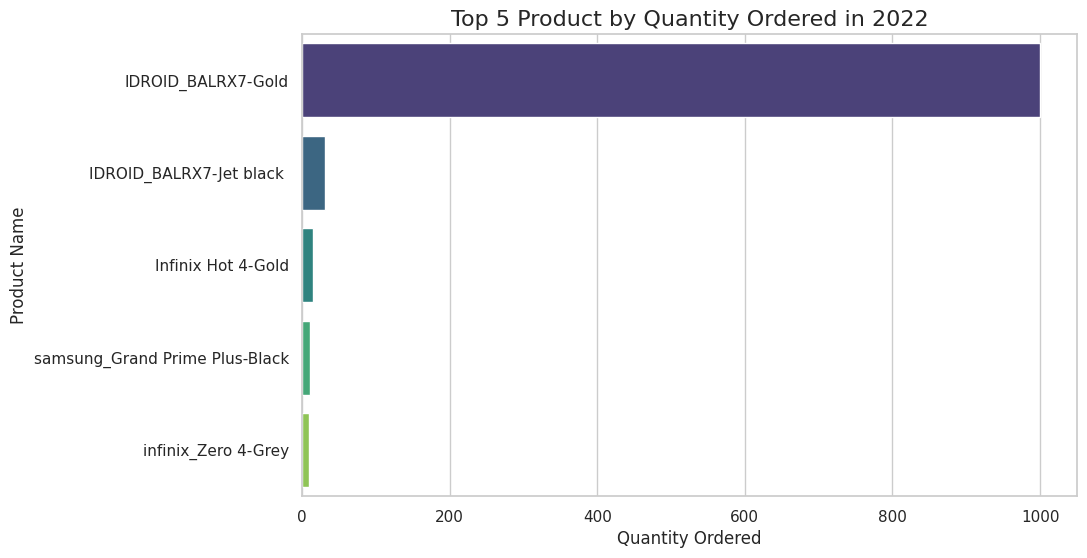

In [14]:
# VISUALIZATION
# Set the Seaborn style (optional aesthetics)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Qty ordered 2022', y='sku_name', data=top5, palette= 'viridis')

#Add labels and title
plt.title('Top 5 Product by Quantity Ordered in 2022', fontsize=16)
plt.ylabel('Product Name', fontsize = 12)
plt.xlabel('Quantity Ordered', fontsize = 12)

# Show the plot
plt.show()

##Insight & Recommendation:
IDROID_BALRX7-Gold leads with 1000 units sold, far surpassing the other products, which show sales between 10 and 31 units. This indicates a strong consumer preference for IDROID_BALRX7-Gold.

It is recommended to focus on IDROID_BALRX7-Gold for the competition prize and future promotions. The lower-performing products should be analyzed for possible pricing or marketing issues, with targeted efforts to improve their performance.

The large sales gap suggests that IDROID_BALRX7-Gold is the clear consumer favorite. In contrast, the other products may not be attracting as much attention, which could be linked to ineffective promotions or lower demand. By focusing on popular products and addressing the issues of lower performers, the company can optimize its strategy for both immediate and long-term sales growth.


## `No 2`
How did sales quantity in the "Others" category change from 2021 to 2022?
1. What is the sales trend for all 15 product categories in this period?
<br></br>
2. If a decline in the "Others" category is confirmed, which 20 products experienced the most significant sales decrease?
<br></br>


## `No 2.1`

In [15]:
# FFilter sales data for 2021 and calculate the total qty_ordered per category.
sales_2021_category = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2021) &
        (df['is_valid'] == 1)
    ]
    .groupby('category')['qty_ordered']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='Total_Quantity_2021')
)

# Filter sales data for 2022 and calculate the total qty_ordered per category.
sales_2022_category = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2022) &
        (df['is_valid'] == 1)
    ]
    .groupby('category')['qty_ordered']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='Total_Quantity_2022')
)

sales_category_growth = sales_2021_category.merge(sales_2022_category, on='category', how='inner')
sales_category_growth['Quantity_Growth'] = sales_category_growth['Total_Quantity_2022'] - sales_category_growth['Total_Quantity_2021']
sales_category_growth.sort_values(by='Quantity_Growth', ascending=True, inplace=True)

#Display the top 15 categories with the highest growth.
sales_category_growth.head(15)


,category,Total_Quantity_2021,Total_Quantity_2022,Quantity_Growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


<ipython-input-16-76b33f86f993>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_category_growth, x='Quantity_Growth', y='category', palette='Blues_r')


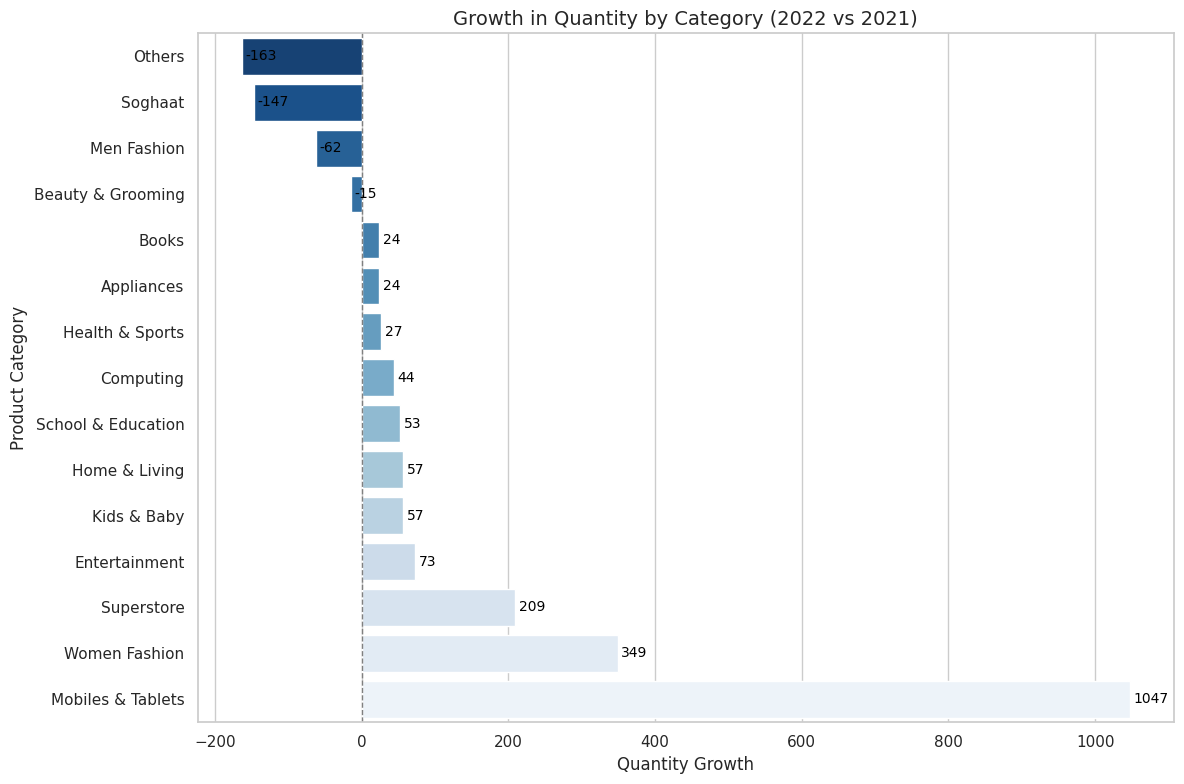

In [16]:
# Create horizontal barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sales_category_growth, x='Quantity_Growth', y='category', palette='Blues_r')

# Add text labels for each bar
for i, (value, name) in enumerate(zip(sales_category_growth['Quantity_Growth'], sales_category_growth['category'])):
    ax.text(value + 5, i, f'{value}', color='black', va='center', fontsize=10)

# Add titles and labels
plt.title('Growth in Quantity by Category (2022 vs 2021)', fontsize=14)
plt.xlabel('Quantity Growth', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Add a vertical line at 0 for reference
plt.tight_layout()
plt.show()

##Insight & Recommendation:
The "Others" category showed a decrease in sales quantity, dropping from 426 units in 2021 to 263 units in 2022, a decline of 163 units. This indicates a clear drop in demand, potentially due to factors such as shifts in consumer preferences or ineffective marketing strategies. It is recommended to review product offerings in this category and assess whether marketing efforts need to be refocused or if the product selection should be adjusted to align with consumer interests.


note
The decrease in sales for this category suggests a potential need to reevaluate pricing, marketing, and promotions. For example, it could be useful to investigate whether the drop in sales is specific to certain products within the category or if the overall consumer interest in the category has decreased.


## `Jawaban No 2.2`

In [17]:
# Provide data on the TOP 20 products with the highest decline in sales in 2022 compared to 2021
sales_2021_others = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2021) &
        (df['category'] == 'Others') &
        (df['is_valid'] == 1)
        ]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='Qty_2021')
)

sales_2022_others = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2022) &
        (df['category'] == 'Others') &
        (df['is_valid'] == 1)
        ]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='Qty_2022')
)

# Merge sales data from 2021 and 2022
sales_comparison = pd.merge(sales_2021_others, sales_2022_others, on='sku_name', how='outer')
sales_comparison.fillna(0, inplace=True)

# Calculate quantity decline
sales_comparison['Qty_Decline'] = sales_comparison['Qty_2022'] - sales_comparison['Qty_2021']

# Sort by highest decline in quantity
sales_comparison_sorted = sales_comparison.sort_values(by='Qty_Decline', ascending=True)

# Select the top 20 products with the most significant decline in quantity
top_20_decline = sales_comparison_sorted.head(20)

# Display results
top_20_decline


,sku_name,Qty_2021,Qty_2022,Qty_Decline
69,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
18,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
84,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
137,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
70,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
141,kansai_NeverWet,10.0,1.0,-9.0
154,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
133,emart_00-1,7.0,1.0,-6.0
93,Vouch 365 2016,5.0,0.0,-5.0
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0


<ipython-input-18-1ae4c16f8857>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


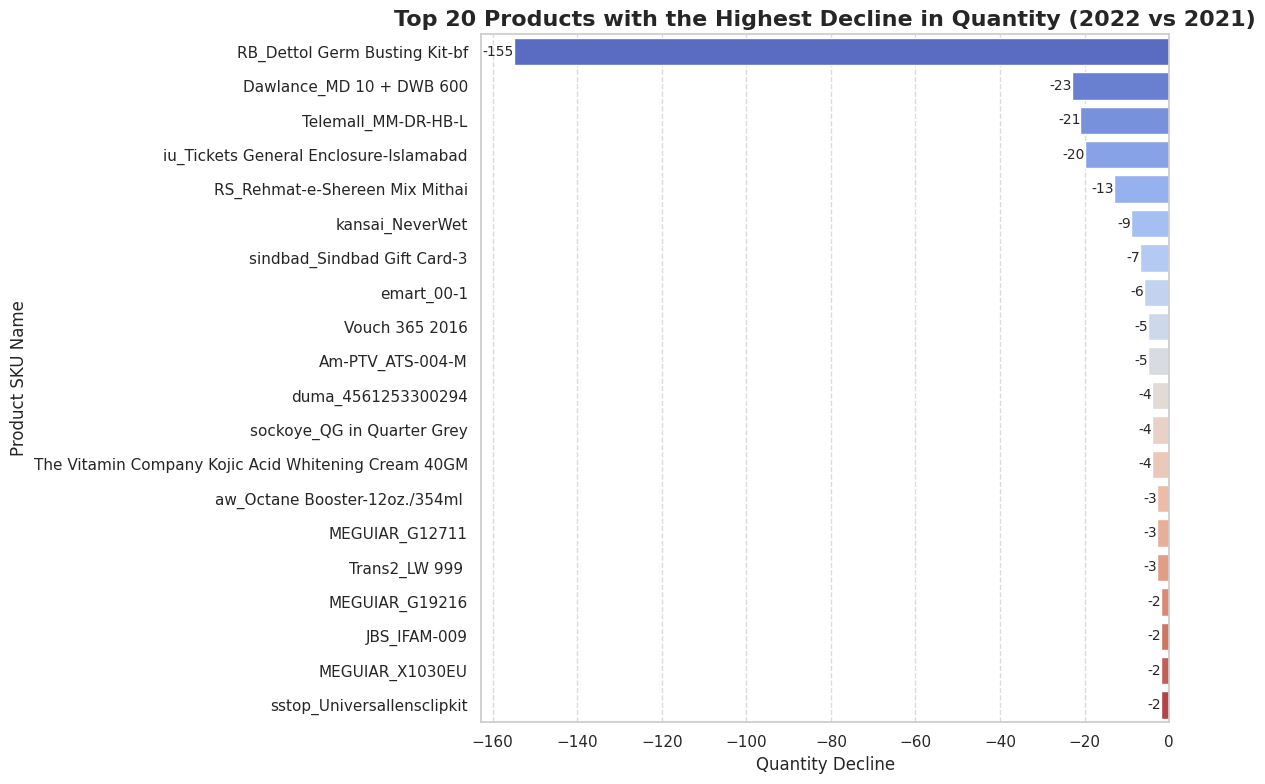

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_20_decline,
    y='sku_name',
    x='Qty_Decline',
    palette='coolwarm'
)
for index, value in enumerate(top_20_decline['Qty_Decline']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='right' if value < 0 else 'left', fontsize=10)
plt.title('Top 20 Products with the Highest Decline in Quantity (2022 vs 2021)', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Decline', fontsize=12)
plt.ylabel('Product SKU Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Insight & Recommendation:
The products with the largest declines in sales include RB_Dettol Germ Busting Kit-bf (-155 units) and Dawlance_MD 10 + DWB 600 (-23 units). This suggests that these products may have lost their appeal in 2022, possibly due to changes in consumer behavior or ineffective marketing.

It is recommended to further investigate these products to understand whether pricing, competition, or marketing strategies contributed to the sales drop. Targeted promotions, product rebranding, or even reconsidering their place in the catalog could help reverse the decline.


## `No 3`

Which customers completed checkout but have not made a payment (is_gross = 1) during 2022?
Provide a list of Customer IDs and their Registered Dates to assist the Digital Marketing Team in planning targeted promotions.



## `Jawaban No 3`

In [19]:
# Filter data
up_transaction = df[
      (df['order_date'].dt.year == 2022) &
      (df['is_valid'] == 0) &
      (df['is_gross']== 1) &
      (df['is_net']== 0)
    ]

# Table for ID customer and registered date
data_customer = up_transaction[['customer_id','registered_date']].drop_duplicates()
data_customer

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


In [20]:
# Run this code to download the file
from google.colab import files

# Save customer data to CSV
data_customer.to_csv('customer_data.csv', encoding='utf-8-sig', index=False)

# Download the CSV file
files.download('customer_data.csv')

# Display success message
print("File 'customer_data.csv' has been successfully created and is ready for download.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File 'customer_data.csv' has been successfully created and is ready for download.


Understanding why these customers abandoned their carts after checkout is crucial. Common reasons may include unexpected additional costs, complicated payment processes, or simply forgetting to finalize the transaction. Personalized follow-up emails highlighting special anniversary deals or offering limited-time discounts might effectively convert these incomplete transactions into successful sales.


## `No 4`
Did the weekend campaign (October–December 2022) significantly impact sales growth (before_discount)?

1. What was the average daily sales on weekends (Saturday & Sunday) compared to weekdays (Monday–Friday) for each month in this period?
2. What was the overall average daily sales comparison between weekends and weekdays for the full three months?



## `No 4.1`

In [21]:
# Calculate the average daily sales on weekends (Saturday and Sunday) vs weekdays (Monday-Friday)
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_number'] = df['order_date'].dt.month

filtered_data = df[
    (df['is_valid'] == 1) &
    (df['order_date'].dt.year == 2022) &
    (df['order_date'].dt.month.isin([10, 11, 12]))
]

# Calculate the average sales per day for weekdays (Monday-Friday)
weekdays_avg = (
    filtered_data[filtered_data['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
    .groupby('month_number')['before_discount']
    .mean()
    .round(2)
    .reset_index(name='avg_sales_weekdays')
)

# Calculate the average sales per day for weekends (Saturday & Sunday)
weekends_avg = (
    filtered_data[filtered_data['day'].isin(['Saturday', 'Sunday'])]
    .groupby('month_number')['before_discount']
    .mean()
    .round(2)
    .reset_index(name='avg_sales_weekends')
)

# Merge the aggregated results for weekdays and weekends based on 'month_number'
monthly_avg = pd.merge(weekdays_avg, weekends_avg, on='month_number')
# Map month_number to month names
monthly_avg['month'] = monthly_avg['month_number'].map({10: 'October', 11: 'November', 12: 'December'})
# Display results
monthly_avg


,month_number,avg_sales_weekdays,avg_sales_weekends,month
0,10,874690.27,634260.07,October
1,11,641862.00,607794.21,November
2,12,813574.29,410599.40,December


In [22]:
# columns for difference and percentage change
monthly_avg['difference'] = (monthly_avg['avg_sales_weekends'] - monthly_avg['avg_sales_weekdays']).round(2)
monthly_avg['%diff'] = (monthly_avg['difference'] / monthly_avg['avg_sales_weekdays'] * 100).round(2)
print(monthly_avg[['month', 'avg_sales_weekdays', 'avg_sales_weekends', 'difference', '%diff']])

      month  avg_sales_weekdays  avg_sales_weekends  difference  %diff
0   October           874690.27           634260.07  -240430.20 -27.49
1  November           641862.00           607794.21   -34067.79  -5.31
2  December           813574.29           410599.40  -402974.89 -49.53


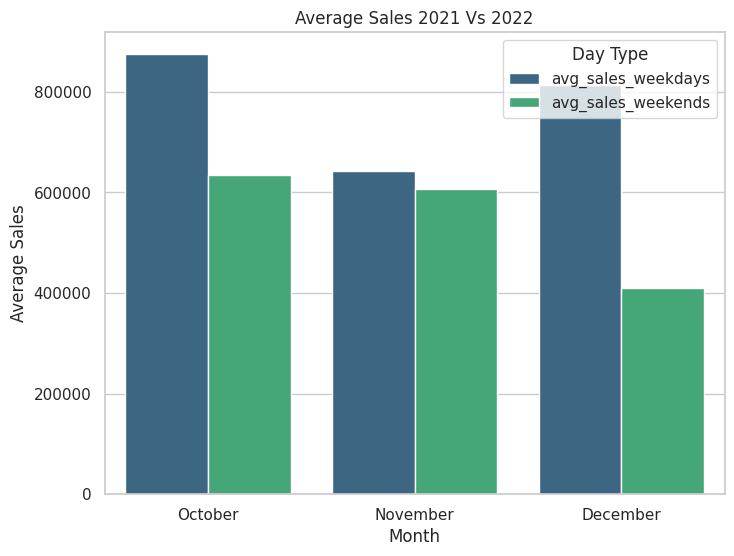

In [23]:
# Chart
plt.figure(figsize=(8, 6))
sns.barplot(data=monthly_avg.melt(id_vars='month',
                                  value_vars=['avg_sales_weekdays', 'avg_sales_weekends'],
                                  var_name='Day Type',
                                  value_name='Average Sales'),
            x='month', y='Average Sales', hue='Day Type',palette = 'viridis')  # Grafik batang
plt.title("Average Sales 2021 Vs 2022")
plt.ylabel("Average Sales")
plt.xlabel("Month")
plt.legend(title="Day Type", loc="upper right")
plt.show()

##Insight
The data revealed that weekend sales were consistently lower than weekday sales throughout October, November, and December 2022. October showed the most significant difference, with weekend sales dropping by 27.49% compared to weekdays. November and December followed with decreases of 5.31% and 49.53%, respectively. This suggests that the weekend campaigns did not achieve the desired impact.

##Recommendation:
Reevaluating promotion types: Introduce more attractive weekend deals or limited-time offers to create urgency.
Personalized targeting: Use customer segmentation to target high-value customers with tailored weekend promotions.
Testing different timeframes: Shift campaigns to weekdays, particularly mid-week, which may align better with customer purchasing behavior.


## `Jawaban No 4.2`

In [24]:
# Average daily sales on weekends (Saturday and Sunday) vs average daily sales on weekdays (Monday-Friday)
# for the entire 3-month period.
weekends = filtered_data[filtered_data['day'].isin(['Saturday', 'Sunday'])]
weekdays = filtered_data[filtered_data['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Calculate the overall average daily sales for weekends and weekdays
weekends_avg_overall = weekends['before_discount'].mean()
weekdays_avg_overall = weekdays['before_discount'].mean()

overall_avg = pd.DataFrame({
    'Day Type': ['Weekdays', 'Weekends'],
    'Average Sales': [weekdays_avg_overall, weekends_avg_overall],
    'Month': ['October - December', 'October - December'],
})

overall_comparison = {
    "Quarter" : "Q4",
    "Average Weekends" : weekends_avg_overall.round(2),
    "Average Weekdays" : weekdays_avg_overall.round(2),
    "Difference" : (weekends_avg_overall - weekdays_avg_overall).round(2),
    "%Diff" : ((weekends_avg_overall - weekdays_avg_overall) / weekdays_avg_overall* 100).round(2)
}

# TDisplay the results in a table with difference and percentage change
pd.DataFrame([overall_comparison])


,Quarter,Average Weekends,Average Weekdays,Difference,%Diff
0,Q4,558865.15,770146.01,-211280.86,-27.43


<ipython-input-25-672db5891f42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_avg, x='Day Type', y='Average Sales', palette='viridis')


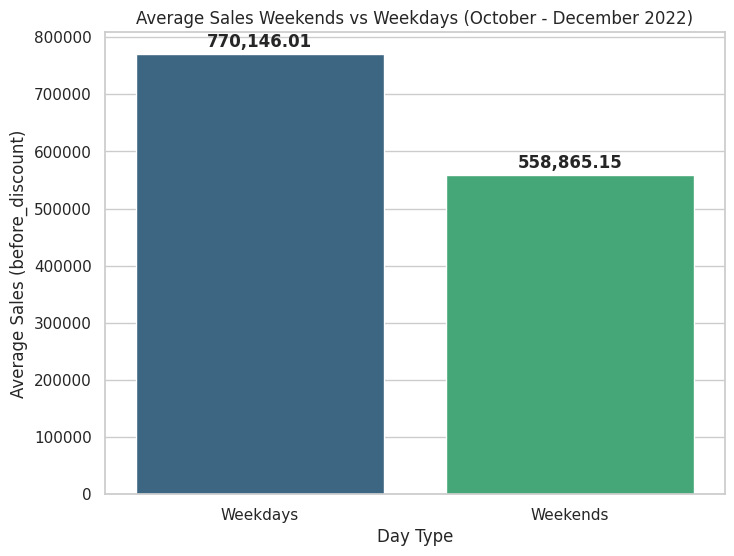

In [25]:
# Visualization graph
plt.figure(figsize=(8, 6))
sns.barplot(data=overall_avg, x='Day Type', y='Average Sales', palette='viridis')
plt.title("Average Sales Weekends vs Weekdays (October - December 2022)")
plt.ylabel("Average Sales (before_discount)")
plt.xlabel("Day Type")

for i, v in enumerate(overall_avg['Average Sales']):
    plt.text(i, v + 5000, f"{v:,.2f}", ha='center', va='bottom', fontweight='bold')

plt.show()

##Insight
The overall results showed that weekend sales averaged 558,865, while weekday sales were significantly higher at 770,146. Even with continuous weekend campaigns, the data showed a persistent 27% drop in sales compared to weekdays. This indicates that the weekend campaigns did not effectively boost sales. To improve future outcomes, I recommend either enhancing the weekend promotions with more compelling offers or exploring weekday campaigns, where customer engagement seems naturally higher.

##Recommendation:
Weekend Campaign Optimization: If weekend promotions are necessary, consider bundling products, offering time-limited discounts, or enhancing the value proposition to drive urgency and increase sales.
Analyze competitor campaigns: Benchmark against competitor promotions during similar periods to refine marketing tactics.


#Conclusion
This project demonstrates the strategic application comprehensive data analysis within the e-commerce sector, enabling data-driven decision-making to optimize business performance and customer engagement. The key outcomes of this analysis are as follows:


1.   Customer Segmentation:
We identified distinct customer groups, including one-time buyers, repeat customers, and loyal customers. These insights provide valuable direction for personalized marketing strategies to increase customer retention and lifetime value.
2.   Identifying Potential Revenue:
By analyzing customers who completed the checkout process but did not proceed with payment, we highlighted a target audience for retargeting campaigns, offering opportunities to recover lost revenue.
3.   Campaign Performance Evaluation:
The comparison of weekend and weekday sales during the Q4 2022 campaign revealed that weekend promotions did not significantly boost sales. This suggests the need for revising promotional strategies to maximize their effectiveness.
4.   Data-Driven Decision Making:
The insights derived from these analyses support informed decision-making in optimizing marketing strategies, improving customer targeting, and refining promotional activities.


